In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
# height (cm), input data, each row is a data point
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

ModuleNotFoundError: No module named 'numpy'

In [ ]:
y

In [ ]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # each point is one row
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
# weights
w_0, w_1 = w[0], w[1]

NameError: name 'np' is not defined

In [ ]:
one

NameError: name 'one' is not defined

In [ ]:
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [ ]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0
print("Input 155cm, true output 52kg, predicted output %.2fkg" %(y1) )
print("Input 160cm, true output 56kg, predicted output %.2fkg" %(y2) )

Input 155cm, true output 52kg, predicted output 52.94kg
Input 160cm, true output 56kg, predicted output 55.74kg


# Thu vien sciket-learn 

In [ ]:
from sklearn import datasets, linear_model
# fit the model by Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X, y) # in scikit-learn, each sample is one row
# Compare two results
print("scikit-learn’s solution : w_1 = ", regr.coef_[0], "w_0 = ", regr.intercept_)
print("our solution : w_1 = ", w[1], "w_0 = ", w[0])

ModuleNotFoundError: No module named 'sklearn'

# k-Mean 

In [ ]:
from __future__ import print_function
import numpy as np
from time import time # for comparing runing time
d, N = 1000, 10000 # dimension, number of training points
X = np.random.randn(N, d) # N d-dimensional points
z = np.random.randn(d)

In [ ]:
# naively compute square distance between two vector
def dist_pp(z, x):
    d = z - x.reshape(z.shape) # force x and z to have the same dims
    return np.sum(d*d)
# from one point to each point in a set, naive
def dist_ps_naive(z, X):
    N = X.shape[0]
    res = np.zeros((1, N))
    for i in range(N):
        res[0][i] = dist_pp(z, X[i])
    return res
# from one point to each point in a set, fast
def dist_ps_fast(z, X):
    X2 = np.sum(X*X, 1) # square of l2 norm of each ROW of X
    z2 = np.sum(z*z) # square of l2 norm of z
    return X2 + z2 - 2*X.dot(z) # z2 can be ignored
t1 = time()
D1 = dist_ps_naive(z, X)
print("naive point2set, running time:", time() - t1, "s")
t1 = time()
D2 = dist_ps_fast(z, X)
print("fast point2set , running time:", time() - t1, "s")
print("Result difference:", np.linalg.norm(D1 - D2))

naive point2set, running time: 0.08446788787841797 s
fast point2set , running time: 0.031200408935546875 s
Result difference: 2.4305597168712303e-11


In [ ]:
M = 100
Z = np.random.randn(M, d)
# from each point in one set to each point in another set, half fast
def dist_ss_0(Z, X):
    M = Z.shape[0]
    N = X.shape[0]
    res = np.zeros((M, N))
    for i in range(M):
        res[i] = dist_ps_fast(Z[i], X)
    return res

# from each point in one set to each point in another set, fast
def dist_ss_fast(Z, X):
    X2 = np.sum(X*X, 1) # square of l2 norm of each ROW of X
    Z2 = np.sum(Z*Z, 1) # square of l2 norm of each ROW of Z
    return Z2.reshape(-1, 1) + X2.reshape(1, -1) - 2*Z.dot(X.T)

t1 = time()
D3 = dist_ss_0(Z, X)
print("half fast set2set running time:", time() - t1, "s")

t1 = time()
D4 = dist_ss_fast(Z, X)
print("fast set2set running time", time() - t1, "s")
print("Result difference:", np.linalg.norm(D3 - D4))

half fast set2set running time: 2.8714070320129395 s
fast set2set running time 0.04520750045776367 s
Result difference: 9.050529108618259e-11


# Iris Flower

In [ ]:
from __future__ import print_function
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.metrics import accuracy_score # for evaluating results

In [ ]:
np.random.seed(7)
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print("Labels:", np.unique(iris_y))
# split train and test
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=130)
print("Train size:", X_train.shape[0], ", test size:", X_test.shape[0])

Labels: [0 1 2]
Train size: 20 , test size: 130


In [ ]:
# 1kNN

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 92.31 %


In [ ]:
# 7kNN

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

NameError: name 'neighbors' is not defined

In [ ]:
100*accuracy_score(y_test, y_pred)

94.61538461538461

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2, weights = "distance")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test,y_pred)))

Accuracy of 7NN (1/distance weights): 94.62 %


In [ ]:
def myweight(distances):
    sigma2 = .4 # we can change this number
    return np.exp(-distances**2/sigma2)
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2, weights = myweight)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN (customized weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 7NN (customized weights): 95.38 %


In [5]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
# height (cm), input data, each row is a data point
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([ 49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

ModuleNotFoundError: No module named 'numpy'

In [ ]:
y

In [ ]:
# Building Xbar
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # each point is one row
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
# weights
w_0, w_1 = w[0], w[1]

NameError: name 'np' is not defined

In [2]:
one

NameError: name 'one' is not defined

In [ ]:
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [ ]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0
print("Input 155cm, true output 52kg, predicted output %.2fkg" %(y1) )
print("Input 160cm, true output 56kg, predicted output %.2fkg" %(y2) )

Input 155cm, true output 52kg, predicted output 52.94kg
Input 160cm, true output 56kg, predicted output 55.74kg


# Thu vien sciket-learn 

In [ ]:
from sklearn import datasets, linear_model
# fit the model by Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X, y) # in scikit-learn, each sample is one row
# Compare two results
print("scikit-learn’s solution : w_1 = ", regr.coef_[0], "w_0 = ", regr.intercept_)
print("our solution : w_1 = ", w[1], "w_0 = ", w[0])

ModuleNotFoundError: No module named 'sklearn'

# k-Mean 

In [ ]:
from __future__ import print_function
import numpy as np
from time import time # for comparing runing time
d, N = 1000, 10000 # dimension, number of training points
X = np.random.randn(N, d) # N d-dimensional points
z = np.random.randn(d)

In [ ]:
# naively compute square distance between two vector
def dist_pp(z, x):
    d = z - x.reshape(z.shape) # force x and z to have the same dims
    return np.sum(d*d)
# from one point to each point in a set, naive
def dist_ps_naive(z, X):
    N = X.shape[0]
    res = np.zeros((1, N))
    for i in range(N):
        res[0][i] = dist_pp(z, X[i])
    return res
# from one point to each point in a set, fast
def dist_ps_fast(z, X):
    X2 = np.sum(X*X, 1) # square of l2 norm of each ROW of X
    z2 = np.sum(z*z) # square of l2 norm of z
    return X2 + z2 - 2*X.dot(z) # z2 can be ignored
t1 = time()
D1 = dist_ps_naive(z, X)
print("naive point2set, running time:", time() - t1, "s")
t1 = time()
D2 = dist_ps_fast(z, X)
print("fast point2set , running time:", time() - t1, "s")
print("Result difference:", np.linalg.norm(D1 - D2))

naive point2set, running time: 0.08446788787841797 s
fast point2set , running time: 0.031200408935546875 s
Result difference: 2.4305597168712303e-11


In [ ]:
M = 100
Z = np.random.randn(M, d)
# from each point in one set to each point in another set, half fast
def dist_ss_0(Z, X):
    M = Z.shape[0]
    N = X.shape[0]
    res = np.zeros((M, N))
    for i in range(M):
        res[i] = dist_ps_fast(Z[i], X)
    return res

# from each point in one set to each point in another set, fast
def dist_ss_fast(Z, X):
    X2 = np.sum(X*X, 1) # square of l2 norm of each ROW of X
    Z2 = np.sum(Z*Z, 1) # square of l2 norm of each ROW of Z
    return Z2.reshape(-1, 1) + X2.reshape(1, -1) - 2*Z.dot(X.T)

t1 = time()
D3 = dist_ss_0(Z, X)
print("half fast set2set running time:", time() - t1, "s")

t1 = time()
D4 = dist_ss_fast(Z, X)
print("fast set2set running time", time() - t1, "s")
print("Result difference:", np.linalg.norm(D3 - D4))

half fast set2set running time: 2.8714070320129395 s
fast set2set running time 0.04520750045776367 s
Result difference: 9.050529108618259e-11


# Iris Flower

In [ ]:
from __future__ import print_function
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.metrics import accuracy_score # for evaluating results

In [ ]:
np.random.seed(7)
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print("Labels:", np.unique(iris_y))
# split train and test
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=130)
print("Train size:", X_train.shape[0], ", test size:", X_test.shape[0])

Labels: [0 1 2]
Train size: 20 , test size: 130


In [ ]:
# 1kNN

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 1NN: 92.31 %


In [ ]:
# 7kNN

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

NameError: name 'neighbors' is not defined

In [ ]:
100*accuracy_score(y_test, y_pred)

94.61538461538461

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2, weights = "distance")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN (1/distance weights): %.2f %%" %(100*accuracy_score(y_test,y_pred)))

Accuracy of 7NN (1/distance weights): 94.62 %


In [ ]:
def myweight(distances):
    sigma2 = .4 # we can change this number
    return np.exp(-distances**2/sigma2)
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2, weights = myweight)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN (customized weights): %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 7NN (customized weights): 95.38 %


# K-means clustering 


In [3]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # 3 clusters
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [5]:
means

[[2, 2], [8, 3], [3, 6]]

In [7]:
cov

[[1, 0], [0, 1]]

In [8]:
X

array([[2.07942844, 4.19020236],
       [1.86510785, 2.16051798],
       [2.44269784, 2.62339144],
       ...,
       [2.60566241, 6.46771143],
       [4.67763675, 5.55463181],
       [3.62801566, 6.63056534]])

In [11]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X as initial centroids
    return X[np.random.choice(X.shape[0], k, replace=False)]
def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # return index of the closest centroid
    return np.argmin(D, axis = 1)
def has_converged(centroids, new_centroids):
    # return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) ==
    set([tuple(a) for a in new_centroids]))
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
    # collect all points that are assigned to the k-th cluster
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0) # then take average
    return centroids
def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

In [ ]:
(centroids, labels, it) = kmeans(X, K)
print("Centers found by our algorithm:\n", centroids[-1])
kmeans_display(X, labels[-1])

# Checking by SciKit

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print("Centers found by scikit-learn:")
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)

Centers found by scikit-learn:
[[8.07476866 3.01494931]
 [1.98459808 1.96989964]
 [3.02801296 5.96081708]]


NameError: name 'kmeans_display' is not defined

# MNIST for handwriting

In [25]:
from __future__ import print_function
import numpy as np
from sklearn.datasets import fetch_openml

data_dir = "../../data" # path to your data folder
mnist = fetch_openml("mnist_784", data_home=data_dir)
print("Shape of minst data:", mnist.data.shape)

Shape of minst data: (70000, 784)


In [40]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import random

K = 10 # number of clusters
N = 10000
P = np.random.choice(mnist.data.shape[0], N)
X = mnist.data[P]
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

KeyError: "None of [Int64Index([53757, 14546, 33813, 22948, 40109, 56083, 30995, 17545,  2114,\n            18409,\n            ...\n            31576, 24395, 30372, 25603, 38038, 59216, 51666, 47004, 52146,\n             3000],\n           dtype='int64', length=10000)] are in the [columns]"

# Tach vat the trong anh 

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
img = mpimg.imread("girl13.jpg")
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'girl13.jpg'

In [7]:
img = mpimg.imread("girl13.jpg")

In [60]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

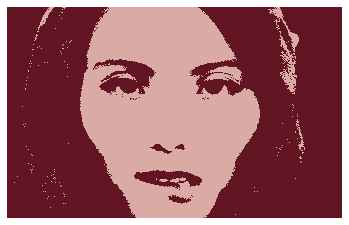

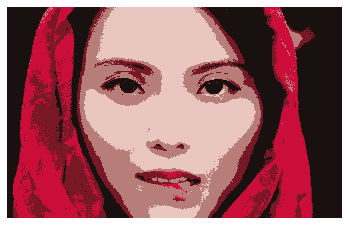

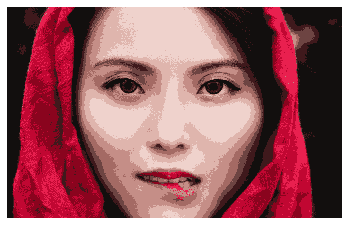

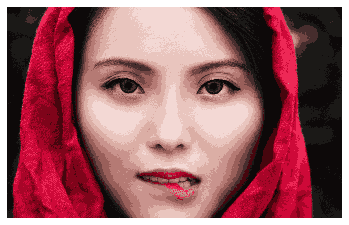

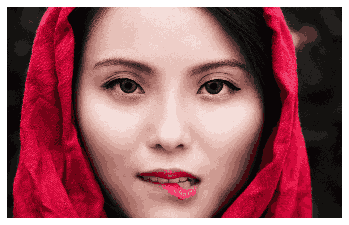

In [62]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

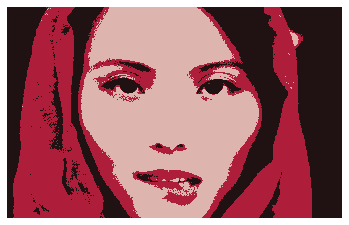

In [63]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

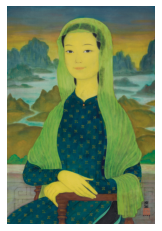

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
img = mpimg.imread("mtt.jpg")
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

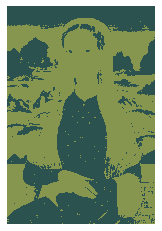

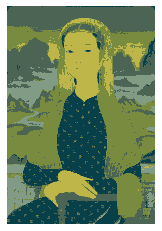

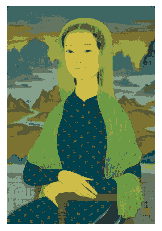

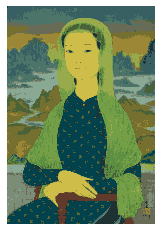

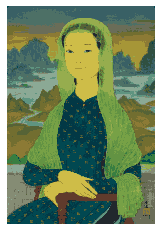

In [13]:
for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)
    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()